# Augmentation Preview
Results saved in `./aug_preview_20250903_202549`

## RandomSafeRotate

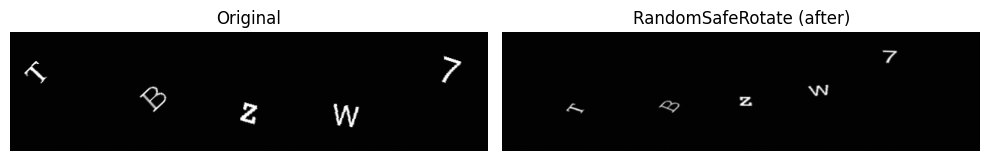

## RandomSafeRotateCrop

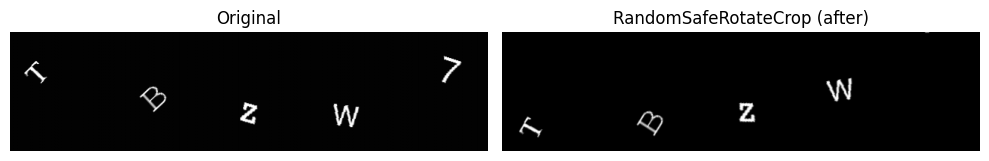

## RandomSafeShear

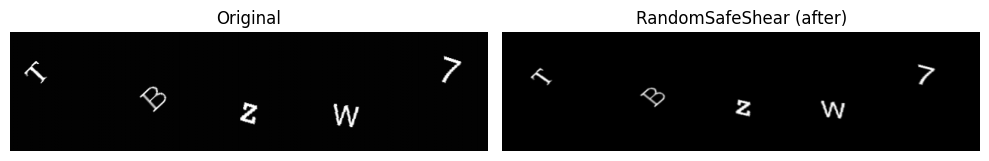

## RandomSafeTranslate

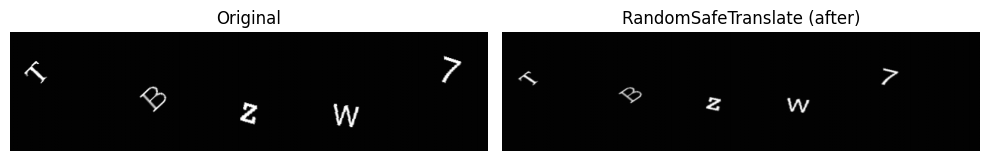

## AddGaussianNoise

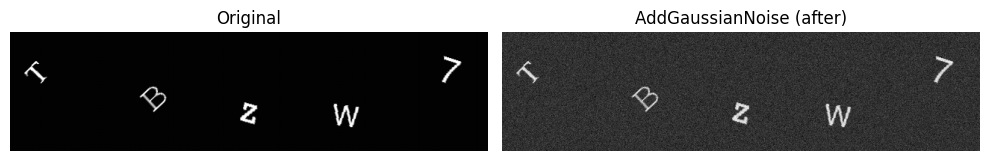

## AddLines

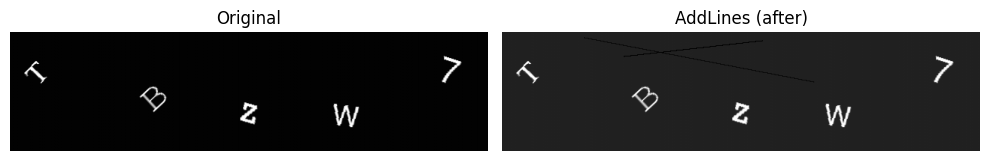

## ColorContrastJitter

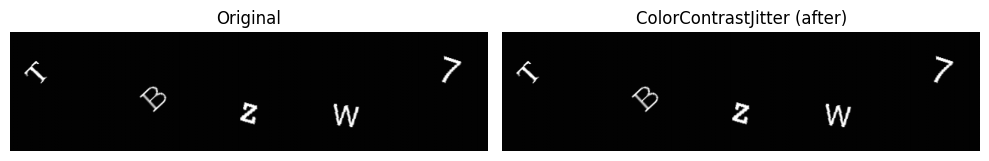

## RandomBrightness

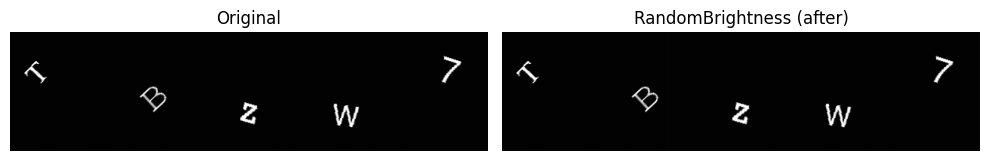

## RandomShrinkIntoCanvas

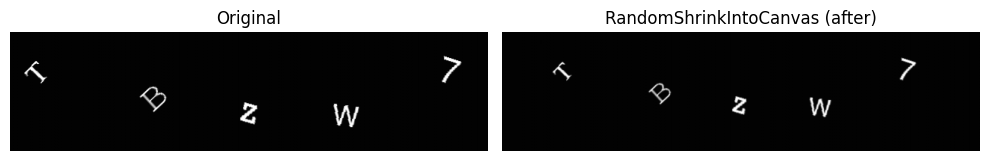

## RandomEnlargeSafely

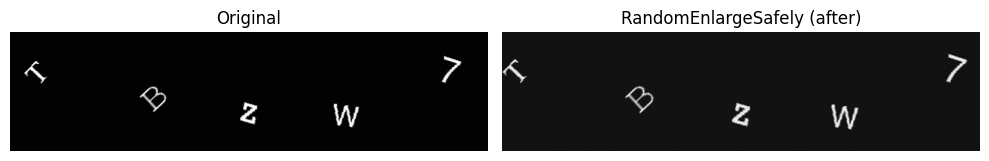

## AddBlobs

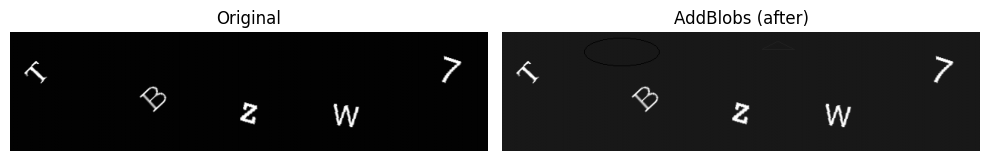

## AddDots

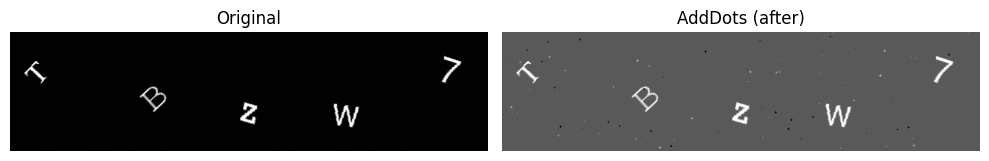

## RandomElasticDistortion

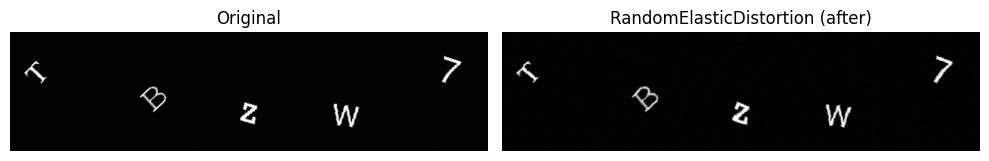

## RandomSinusoidalDistortion

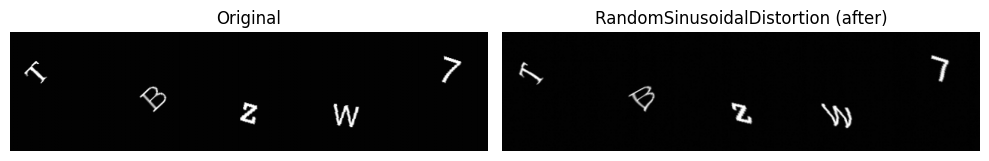

## AddNonASCIIChars

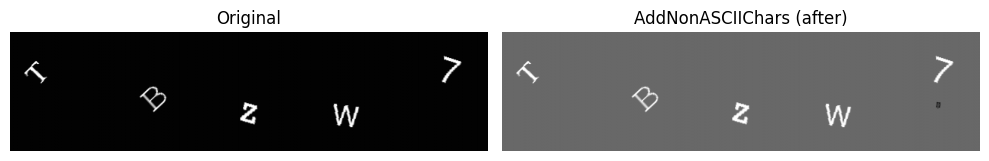

## AddSymbolDistractors

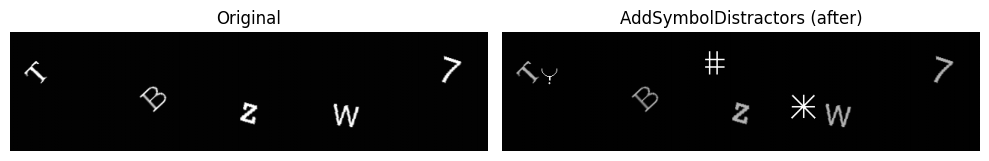

## SimulateCharacterOverlap

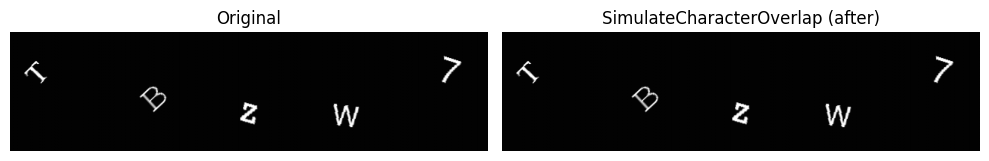

## RandomPerspectiveSafe

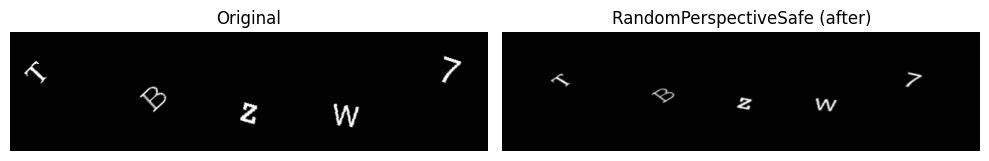

## RandomInvert

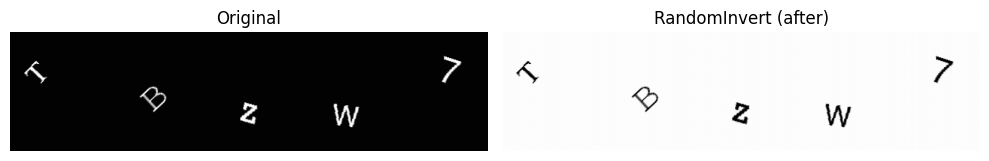

In [39]:
# --- Notebook cell: visualize each augmentation from data_augmentation.py ---

import os, importlib, random
from datetime import datetime
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# 1) Point to your image
IMG_PATH = "000003.png"  # <- change if needed

# 2) Import your module (reload so edits are picked up)
import data_augmentation as da
importlib.reload(da)

# 3) Create an output folder to save all results
ts = datetime.now().strftime("%Y%m%d_%H%M%S")
OUT_DIR = f"./aug_preview_{ts}"
os.makedirs(OUT_DIR, exist_ok=True)

# 4) Load original (grayscale) once
original = Image.open(IMG_PATH).convert("L")

# 5) Helper to show & save before/after for a single augmentation
def show_aug(name, augmenter, img, seed=123):
    # fix seed to make results reproducible per run (esp. for random ops)
    random.seed(seed)

    # run the augmenter
    out = augmenter(img.copy())

    # show markdown section
    display(Markdown(f"## {name}"))

    # plot before/after
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.title("Original")
    plt.imshow(img, cmap="gray")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.title(f"{name} (after)")
    plt.imshow(out, cmap="gray")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

    # # save side-by-side
    # out_path = os.path.join(OUT_DIR, f"{name.replace(' ','_')}.png")
    # out.save(out_path)
    # print(f"Saved: {out_path}")

# 6) Build a list of augmentations (tweak params as you like)
augs = [
    ("RandomSafeRotate",          da.RandomSafeRotate(degrees=18, p=1.0)),
    ("RandomSafeRotateCrop",      da.RandomSafeRotateCrop(degrees=18, p=1.0)),
    ("RandomSafeShear",           da.RandomSafeShear(shear=8, p=1.0)),
    ("RandomSafeTranslate",       da.RandomSafeTranslate(translate=(0.08,0.08), p=1.0)),
    ("AddGaussianNoise",          da.AddGaussianNoise(std=8.0, p=1.0)),
    ("AddLines",                  da.AddLines(n_lines=(2,4), width=(1,2), p=1.0)),
    ("ColorContrastJitter",       da.ColorContrastJitter(brightness=0.2, contrast=0.3, p=1.0)),
    ("RandomBrightness",          da.RandomBrightness(max_delta=0.25, p=1.0)),
    ("RandomShrinkIntoCanvas",    da.RandomShrinkIntoCanvas(min_scale=0.82, max_scale=0.95, p=1.0)),
    ("RandomEnlargeSafely",       da.RandomEnlargeSafely(min_scale=1.05, max_scale=1.20, p=1.0)),
    ("AddBlobs",                  da.AddBlobs(n_blobs=(2,4), p=1.0)),
    ("AddDots",                   da.AddDots(n_dots=(100,160), radius=(0,1), p=1.0)),
    ("RandomElasticDistortion",   da.RandomElasticDistortion(p=1.0, alpha=10.0, sigma=5.0)),
    ("RandomSinusoidalDistortion",da.RandomSinusoidalDistortion(p=1.0, amp=0.02, freq=1.4)),
    ("AddNonASCIIChars",          da.AddNonASCIIChars(glyphs="*#?✓", n_chars=(2,4), p=1.0, size_frac=(0.45,0.70))),
    ("AddSymbolDistractors",      da.AddSymbolDistractors(symbols=['*','tick','?','#','&'], n_symbols=(3,5), p=1.0)),
    ("SimulateCharacterOverlap",  da.SimulateCharacterOverlap(n_overlaps=(1,2), max_shift=(6,10), patch_size=(22,40), p=1.0)),
    ("RandomPerspectiveSafe",     da.RandomPerspectiveSafe(distortion_scale=0.25, p=1.0)),
    ("RandomInvert",              da.RandomInvert(p=1.0)),
]

# 7) Run all and show sections
display(Markdown(f"# Augmentation Preview\nResults saved in `{OUT_DIR}`"))
for name, aug in augs:
    show_aug(name, aug, original, seed=123)


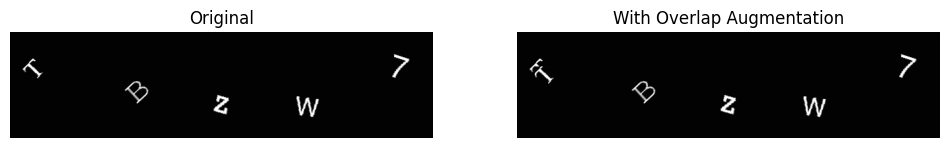

In [56]:
import random
from PIL import Image
import matplotlib.pyplot as plt

class SimulateCharacterOverlap:
    """
    Simulates overlapping character regions by duplicating and shifting
    rectangular patches of the image. No labels required.
    """
    def __init__(self, n_overlaps=(1, 3), max_shift=(5, 15), patch_size=(20, 40), p: float = 0.5):
        self.n_overlaps = n_overlaps
        self.max_shift = max_shift
        self.patch_size = patch_size
        self.p = p

    def __call__(self, img: Image.Image) -> Image.Image:
        if random.random() > self.p:
            return img

        img = img.convert("L")
        w, h = img.size
        draw_img = img.copy()

        for _ in range(random.randint(*self.n_overlaps)):
            pw = random.randint(*self.patch_size)
            ph = random.randint(*self.patch_size)
            x1 = random.randint(0, max(1, w - pw - 1))
            y1 = random.randint(0, max(1, h - ph - 1))

            patch = img.crop((x1, y1, x1 + pw, y1 + ph))

            dx = random.randint(-self.max_shift[0], self.max_shift[0])
            dy = random.randint(-self.max_shift[1], self.max_shift[1])

            x2 = min(max(0, x1 + dx), w - pw)
            y2 = min(max(0, y1 + dy), h - ph)

            draw_img.paste(patch, (x2, y2))

        return draw_img


# === Test the overlap ===
img_path = "000003.png"  # change this path to your image
img = Image.open(img_path).convert("L")

augmentor = SimulateCharacterOverlap(
    n_overlaps=(1, 2),   # fewer overlaps for testing
    max_shift=(8, 20),   # stronger horizontal shift
    patch_size=(25, 50), # larger patch size for visibility
    p=1.0                # always apply for demo
)

aug_img = augmentor(img)

# Show before and after
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(aug_img, cmap="gray")
plt.title("With Overlap Augmentation")
plt.axis("off")

plt.show()

